# Business Understanding

Our company is strategically venturing into the realm of original video content creation by establishing a movie studio, recognizing the trend set by large corporations. To ensure the success of this endeavor, I am undertaking a rigorous data analysis to identify the most appealing genres for our target audience, drawing insights from the preferences of viewers. The objective is to provide actionable recommendations to the studio head, enabling informed decisions regarding the types of films to produce for optimal audience engagement and commercial success. Through this data-driven approach, I aim to position our studio as a competitive player in the dynamic landscape of digital entertainment.

# Exploratory Analysis

## 1. Data Preparation
Loading data files to Notebook.

In [113]:
#Importing necessary libraries for the beginning of the data analysis
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

Loading a SQL database file by IMDB:

In [2]:
#Creating a connection with the SQL data file
connection = sqlite3.connect('im.db')
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor = connection.cursor()
pd.read_sql(sql_query, connection) #reading the sql data file with pandas function
#the names of the different tables in the dataframe will be shown below

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Loading the CSV files:

In [4]:
#Using panda's read_csv to open different data files needed for the analysis
box_office= pd.read_csv('bom.movie_gross.csv.gz')
thenumbers=pd.read_csv('tn.movie_budgets.csv.gz')
moviedb=pd.read_csv('tmdb.movies.csv.gz')
rt_info= pd.read_csv('rt.movie_info.tsv.gz', compression='gzip', delimiter='\t')
rt_reviews=pd.read_csv('rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

Now that the data is loaded into this notebook, we can proceed with the data cleaning process for each data file. 

## 2. Data Cleaning
Cleaning the data files that will be used for this analysis.

I will begin the data cleaning process by organizing the 6 data files into 3 separate sections. For a more detailed insight, you can expand the dropdown button to reveal the specific lines of code used. Each line of code provides clear details about the operation it performs.

### SQL IMDB Data File
Commencing with the exploration of the SQL data file. \
I proceed by selecting the ratings of movies in the US, filtering for those with over 300 votes to ensure significance, and narrowing down to movies relevant within the past 24 years. Subsequently, a new Pandas dataframe is instantiated, incorporating the pertinent data for subsequent analysis.

In [5]:
#Selecting relevant columns from the different tables in the sql data file
query=""" 
SELECT r.movie_id, b.primary_title AS title , b.genres, r.averagerating AS avg_rating, 
    r.numvotes, a.region, primary_name as director, b.start_year, b.runtime_minutes AS mov_minutes 
FROM movie_ratings r 
JOIN movie_basics b ON r.movie_id=b.movie_id 
JOIN movie_akas a ON a.movie_id=b.movie_id 
JOIN directors d ON d.movie_id=a.movie_id 
JOIN persons p ON p.person_id=d.person_id 
WHERE r.numvotes > 3000 AND region='US' AND start_year >= 2000  
ORDER BY averagerating DESC
;"""
#Creating a panda dataframe 'df' of the SQL data file
df=pd.read_sql(query,connection)

In [6]:
#Dataframe starts with 20,832 rows of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     20832 non-null  object 
 1   title        20832 non-null  object 
 2   genres       20832 non-null  object 
 3   avg_rating   20832 non-null  float64
 4   numvotes     20832 non-null  int64  
 5   region       20832 non-null  object 
 6   director     20832 non-null  object 
 7   start_year   20832 non-null  int64  
 8   mov_minutes  20832 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
#Dropping duplicates from the movie_id column
df=df.drop_duplicates(subset=['movie_id'])

In [8]:
#dropping the duplicates of 'movie_id' we get 3,391 unique rows of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 20830
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     3391 non-null   object 
 1   title        3391 non-null   object 
 2   genres       3391 non-null   object 
 3   avg_rating   3391 non-null   float64
 4   numvotes     3391 non-null   int64  
 5   region       3391 non-null   object 
 6   director     3391 non-null   object 
 7   start_year   3391 non-null   int64  
 8   mov_minutes  3391 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 264.9+ KB


In [9]:
#Changing the value type of 'mov_minutes' and 'numvotes' to integer
df['mov_minutes'] = df['mov_minutes'].astype(int)
df['numvotes'] = df['numvotes'].astype(int)

In [10]:
#Dropping duplicates from the column title, 19 rows dropped (0.006% of the rows)
df=df.drop_duplicates(subset=['title'])

In [11]:
#Checking for NAs in the dataframe
df.isna().sum()

movie_id       0
title          0
genres         0
avg_rating     0
numvotes       0
region         0
director       0
start_year     0
mov_minutes    0
dtype: int64

In [12]:
#checking the information per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 20830
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     3372 non-null   object 
 1   title        3372 non-null   object 
 2   genres       3372 non-null   object 
 3   avg_rating   3372 non-null   float64
 4   numvotes     3372 non-null   int64  
 5   region       3372 non-null   object 
 6   director     3372 non-null   object 
 7   start_year   3372 non-null   int64  
 8   mov_minutes  3372 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 263.4+ KB


A recommendation will be made based on the genre of movies using this dataframe, therefore I will be filtering the most relevant genres that are needed for the analysis.

In [13]:
#The count of values in the genres column goes from 1 to 161
df['genres'].value_counts()

Comedy,Drama               161
Drama                      155
Comedy,Drama,Romance       150
Comedy                     121
Drama,Romance               94
                          ... 
Biography,Drama,Musical      1
Action,Fantasy,War           1
Thriller,Western             1
Fantasy,Thriller             1
Fantasy,Romance              1
Name: genres, Length: 330, dtype: int64

Given that the value count of genres is from 1 to 161, I will be using the most relevant genres. I estimate that analyzing genres with count over 50 will be the best approach.

In [14]:
#creating the variable genre_counts with the value_counts function
genre_counts = df['genres'].value_counts()
#creating a list of genres that have a count greater than 50
genres_over50 = genre_counts[genre_counts > 50].index.tolist()
#using the isin() method to filter the dataframe based on the selected genres over 50 count
df1 = df[df['genres'].isin(genres_over50)]    

In [15]:
#Checking the cleaned dataframe from IMDB 
#new name of the filtered dataframe
df1.head()

,movie_id,title,genres,avg_rating,numvotes,region,director,start_year,mov_minutes
0,tt7131622,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,US,Quentin Tarantino,2019,159
2,tt7738784,Peranbu,Drama,9.4,9629,US,Ram,2018,147
8,tt2170667,Wheels,Drama,9.3,17308,US,Donavon Warren,2014,115
11,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,US,Christopher Nolan,2010,148
15,tt6019206,Kill Bill: The Whole Bloody Affair,"Action,Crime,Thriller",8.8,3406,US,Quentin Tarantino,2011,247


### Rotten Tomatoes Data Files

Getting detailed information of the Rotten Tomatoes Info data file per column.
The rt_info dataframe has 1560 rows and 12 columns of data.

In [16]:
#checking info per column
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [17]:
#Changing the date column to datetime format
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])

In [18]:
#creating new columns for month and year
rt_info['theater_month']=rt_info['theater_date'].dt.month
rt_info['theater_year']=rt_info['theater_date'].dt.year

In [19]:
#Filtering movies from 2000 until now in the 'theater_year' column
rt_info=rt_info[(rt_info['theater_year']>=2000)]

In [20]:
#dropping NA values from the box office column
rt_info=rt_info.dropna(subset=['box_office'])

To not lose valuable information I will fill the corresponding director, writer and studio columns NA values with the string 'Not Available'.

In [21]:
#replacing NA values with string
rt_info.loc[:, 'director'] = rt_info['director'].fillna('Not Available')
rt_info.loc[:, 'studio'] = rt_info['studio'].fillna('Not Available')

In [22]:
#dropping NA values from the runtime column
rt_info.dropna(subset=['runtime'], inplace=True)

In [23]:
#Dropping columns that are not necessary for analysis
rt_info.drop(columns=['theater_date', 'dvd_date', 'writer', 'synopsis', 'currency'], inplace=True)

In [24]:
#checking for the NA values per column
rt_info.isna().sum()

id               0
rating           0
genre            0
director         0
box_office       0
runtime          0
studio           0
theater_month    0
theater_year     0
dtype: int64

In [25]:
#checking the value count in the runtime column
rt_info['runtime'].value_counts()

95 minutes     12
91 minutes     11
93 minutes     11
115 minutes    11
108 minutes    11
               ..
81 minutes      1
170 minutes     1
138 minutes     1
67 minutes      1
124 minutes     1
Name: runtime, Length: 74, dtype: int64

In [26]:
# Extracting the first numbers from the runtime column
rt_info['runtime']=rt_info['runtime'].str.extract('(\d+)').astype(int)

In [27]:
#changing the box office, month and year columns to integer type value for easier analysis
rt_info['box_office'] = rt_info['box_office'].str.replace(',', '').astype(int)
rt_info['theater_month']=rt_info['theater_month'].astype(int)
rt_info['theater_year']=rt_info['theater_year'].astype(int)

In [28]:
#setting the float format from the dataframe to display numbers with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

#calling the describe info to check for new format
rt_info.describe()

,id,box_office,runtime,theater_month,theater_year
count,324.00,324.00,324.00,324.00,324.00
mean,1018.20,38655398.52,106.35,6.94,2008.36
std,582.73,58234237.38,19.41,3.43,4.70
min,3.00,363.00,15.00,1.00,2000.00
25%,487.50,2025631.25,93.00,4.00,2004.00
50%,1050.50,14422032.00,104.50,7.00,2008.00
75%,1523.50,47182321.00,117.00,10.00,2012.00
max,1996.00,368000000.00,229.00,12.00,2018.00


In the rating column, I will be dropping the ratings that are not part of the Film Rating System.

In [29]:
#checking the values and counts from the rating column
rt_info['rating'].value_counts()

#keeping values that are not NR and NC17 because they are not considered ratings in the film rating system
rt_info = rt_info[~rt_info['rating'].isin(['NR', 'NC17'])]

#checking the values
print(rt_info['rating'])

1           R
6       PG-13
7           R
8           R
15          R
        ...  
1530       PG
1541    PG-13
1545        R
1546       PG
1555        R
Name: rating, Length: 310, dtype: object


Second Data file from rotten tomatoes website.

Starting the data cleaning of Rotten Tomatoes Reviews. The data file contains 54,432 rows of data, and 8 columns of information.

In [30]:
#Checking for missing information per column
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


I want to keep the movie rating intact even if a critic didn't leave a review. So, any missing reviews will simply be filled with the word 'None'.

In [31]:
#Changing missing reviews to 'None'
rt_reviews['review']=rt_reviews['review'].fillna('None')

In [32]:
#dropping the NAs in the publisher column
rt_reviews.dropna(subset=['publisher'], inplace=True)

NA values in the rating column that are missing will be dropped. We can't validate/confirm the 'fresh' value in the column without the rating.

In [33]:
#Dropping NAs in rating column
rt_reviews.dropna(subset=['rating'], inplace=True)

In [34]:
#Dropping NAs from the critics column
rt_reviews.dropna(subset=['critic'], inplace=True)

In [35]:
#checking for the NAs in all the columns
rt_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

I'll convert the date column values into datetime format and split them into separate columns for month and year to facilitate analysis. Afterwards, I'll filter out movies released from 2000 to the present.

In [36]:
#using date time function to change the date column
rt_reviews['date']=pd.to_datetime(rt_reviews['date'])

In [37]:
#separating month and year columns from the date column
rt_reviews['month']=rt_reviews['date'].dt.month
rt_reviews['year']=rt_reviews['date'].dt.year

In [38]:
#filtering data frame to rows with information from the 2000's to now.
rt_reviews=rt_reviews[(rt_reviews['year']>=2000)]

In [39]:
#Dropping reviews with no rating, they dont add value to the data file
rt_reviews['rating']=rt_reviews.dropna(subset=['rating'], inplace=True )

In [40]:
#checking the head of the dataframe 'rt_reviews'
rt_reviews.head(5)

,id,review,rating,fresh,critic,top_critic,publisher,date,month,year
0,3,A distinctly gallows take on contemporary fina...,None,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,11,2018
6,3,"Quickly grows repetitive and tiresome, meander...",None,rotten,Eric D. Snider,0,EricDSnider.com,2013-07-17,7,2013
7,3,Cronenberg is not a director to be daunted by ...,None,rotten,Matt Kelemen,0,Las Vegas CityLife,2013-04-21,4,2013
11,3,"While not one of Cronenberg's stronger films, ...",None,fresh,Emanuel Levy,0,EmanuelLevy.Com,2013-02-03,2,2013
12,3,Robert Pattinson works mighty hard to make Cos...,None,rotten,Christian Toto,0,Big Hollywood,2013-01-15,1,2013


### Business/Revenue Related Data Files


I'll kickstart the data cleaning process by examining the data file sourced from "The Numbers," a reputable website renowned for meticulously tracking business information related to movies.

In [41]:
#Dataframe contains 5,782 rows of information and 6 columns.
thenumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [42]:
#Dropping duplicates using the column 'movie'
thenumbers=thenumbers.drop_duplicates(subset=['movie'])

In [43]:
#Dropping movies that have a domestic and worlwide gross revenue of $0
thenumbers=thenumbers[thenumbers['domestic_gross'] != '$0']
thenumbers=thenumbers[thenumbers['worldwide_gross'] != '$0']

In [44]:
#changing the 'release_date' column to date time format
thenumbers['release_date'] = pd.to_datetime(thenumbers['release_date'])

In [45]:
#Creating new columns for year and month of the release of a movie
thenumbers['release_month']=thenumbers['release_date'].dt.month
thenumbers['release_year']=thenumbers['release_date'].dt.year

In [46]:
#Filtering the data frame to include only movies from the 2000's to now
thenumbers=thenumbers[(thenumbers['release_year'] >= 2000)]

In [47]:
#changing the columns from float to integer
thenumbers['production_budget']=thenumbers['production_budget'].replace('[\$,]', '', regex=True).astype(int)
thenumbers['domestic_gross']=thenumbers['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
thenumbers['worldwide_gross']=thenumbers['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)

In [48]:
#Setting the display format for floating-point numbers to show 2 decimal places.
pd.set_option('display.float_format', '{:.2f}'.format)

In [49]:
#checking for a clean dataframe
thenumbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_month        0
release_year         0
dtype: int64

In [50]:
#checking the dataframe's head rows
thenumbers.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


Starting the data cleansing process for the data file from "The Box Office Mojo" Website which tracks box-office revenue.

In [51]:
#getting information from the dataframe
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [52]:
#Dropping duplicates from the dataframe
box_office=box_office.drop_duplicates(subset=['title'])

In [53]:
#checking sum of NA values per column
box_office.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1349
year                 0
dtype: int64

In [54]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3386 non-null   object 
 1   studio          3381 non-null   object 
 2   domestic_gross  3358 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3386 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.7+ KB


In [55]:
#Dropping NA values from the dataframe if they are NA in the column
box_office=box_office.dropna(subset=['studio'])
box_office=box_office.dropna(subset=['domestic_gross'])

In [56]:
#Changing the value type to integer for better/easier analysis
box_office['domestic_gross']=box_office['domestic_gross'].astype(int)

In [57]:
#Fill the NA values of foreign gross with 0 to not lose a great part of data
box_office['foreign_gross']=box_office['foreign_gross'].fillna('0')

In [58]:
#Changing the foreign gross value type to integer
box_office['foreign_gross'] = box_office['foreign_gross'].replace(',', '', regex=True)
box_office['foreign_gross'] = box_office['foreign_gross'].str.split('.').str[0]  # Remove decimal places
box_office['foreign_gross'] = box_office['foreign_gross'].astype(int)  # Convert to integers

In [59]:
#checking one last time the sum of NA values per column
box_office.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

# Data Analysis
The objective of this analysis is to guide the company in making informed decisions regarding the initiation of our new venture into the film business. I will analyze various data files sourced from reputable and influential film websites, leveraging information including release dates, box office performance, production budgets, domestic and international revenue, among other key metrics.

### Movie Genres with the highest number of votes and rating.

In [60]:
#starting with df1 dataframe
df1.head()

,movie_id,title,genres,avg_rating,numvotes,region,director,start_year,mov_minutes
0,tt7131622,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.70,5600,US,Quentin Tarantino,2019,159
2,tt7738784,Peranbu,Drama,9.40,9629,US,Ram,2018,147
8,tt2170667,Wheels,Drama,9.30,17308,US,Donavon Warren,2014,115
11,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.80,1841066,US,Christopher Nolan,2010,148
15,tt6019206,Kill Bill: The Whole Bloody Affair,"Action,Crime,Thriller",8.80,3406,US,Quentin Tarantino,2011,247


Filtering the average rating of movies to be higher than 4, and the number of votes a movie has to be over 10,000.

In [61]:
#updating the dataframe to the filters required
df1=df1[(df1['avg_rating'] > 4 ) & (df1['numvotes'] > 10000)]

Creating a variable that will group by genres the average rating of the movies and show its statistical measures

In [62]:
#Using groupby function with aggregation of stat measures.
rating_by_genre=df1[['genres', 'avg_rating']].groupby(['genres']).agg(['count', 'median', 'mean'])
rating_by_genre = rating_by_genre.sort_values(by=('avg_rating', 'count'), ascending=False) #Sort by rating mean in descending order
rating_by_genre

avg_rating            
                                count median mean
genres                                           
Comedy,Drama,Romance               97   6.50 6.48
Comedy,Drama                       88   6.70 6.69
Drama                              71   7.20 7.12
Adventure,Animation,Comedy         69   6.70 6.64
Drama,Romance                      61   6.80 6.84
Comedy,Romance                     58   6.10 6.08
Action,Adventure,Sci-Fi            56   6.90 6.82
Action,Crime,Drama                 56   6.50 6.48
Comedy                             54   6.00 5.98
Horror,Mystery,Thriller            51   5.80 5.82
Horror,Thriller                    42   5.70 5.65
Crime,Drama,Thriller               36   6.65 6.60
Action,Crime,Thriller              33   6.50 6.40
Drama,Thriller                     29   6.50 6.51
Documentary                        19   7.60 7.32

In [63]:
df1['avg_rating'].describe()

count   820.00
mean      6.50
std       0.86
min       4.10
25%       5.90
50%       6.50
75%       7.10
max       9.30
Name: avg_rating, dtype: float64

The mean of the average rating is 6.5 points, denoted by the horizontal dashed red line displayed on the graph below. Additionally, for my analysis, I will only consider genre categories with a count of 39 or more movies as significant, marked by the x-values above the red line in the graph below.

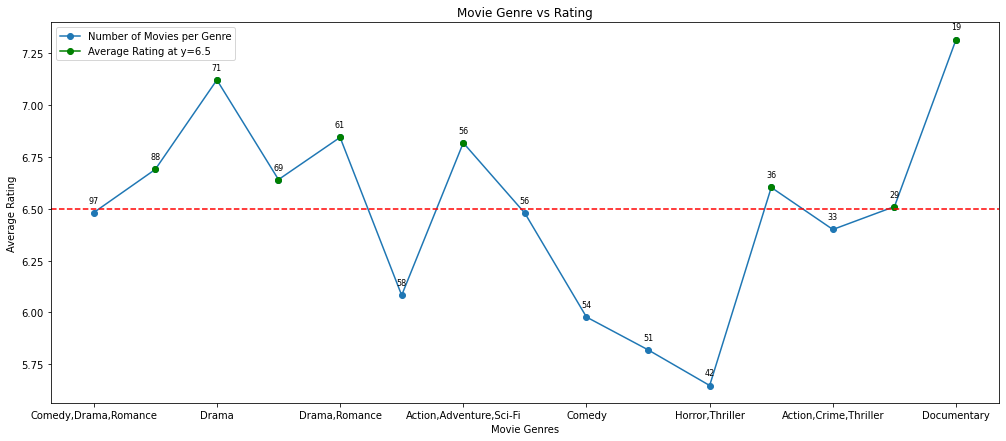

<Figure size 432x288 with 0 Axes>

In [114]:
#plotting the line chart
fig, ax = plt.subplots(figsize=(17, 7))
rating_by_genre['avg_rating']['mean'].plot(kind='line', marker='o', ax=ax)

#labels to the markers indicating the count of values
for i, genre in enumerate(rating_by_genre.index):
    count = rating_by_genre['avg_rating']['count'][i]
    ax.annotate(str(count), (i, rating_by_genre['avg_rating']['mean'][i]), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=8)

    # highlight markers with y value at or over 6.5
    if rating_by_genre['avg_rating']['mean'][i] >= 6.5:
        ax.plot(i, rating_by_genre['avg_rating']['mean'][i], marker='o', color='green')
        
#add a horizontal line at y=6.5
ax.axhline(y=6.5, color='red', linestyle='--', label='Average Rating at y=6.5')

#set the labels and title
ax.set_title("Movie Genre vs Rating")
ax.set_xlabel("Movie Genres")
ax.set_ylabel("Average Rating")

#add a legend
ax.legend(['Number of Movies per Genre', 'Average Rating at y=6.5'])

#display the plot
plt.show()

#save plot
plt.savefig("./Graphs/line_rating_genre.png", dpi=150)

The graph shows that the most significant Movie Genres with the highest number of Votes as well as having the highest ratings are Comedy, Drama, Romance, Action, Adventure and Sci-Fi.

I will use the average number of votes to make predictions based on it.

In [65]:
mean_value = df1['numvotes'].mean()
print(mean_value)

95108.0243902439


Looking for movies with a mean of over 95,000 number of votes.\
I will be grouping the genres by the count, median and mean of the number of votes those movies got to get a viualization from this statistical summary.

In [66]:
#grouping the genres and numvotes columns as votes by genre
votes_by_genre=df1[['genres', 'numvotes']].groupby(['genres']).agg(['count', 'median', 'mean'])
votes_by_genre = votes_by_genre.sort_values(by=('numvotes', 'mean'), ascending=False) #descencing order needed

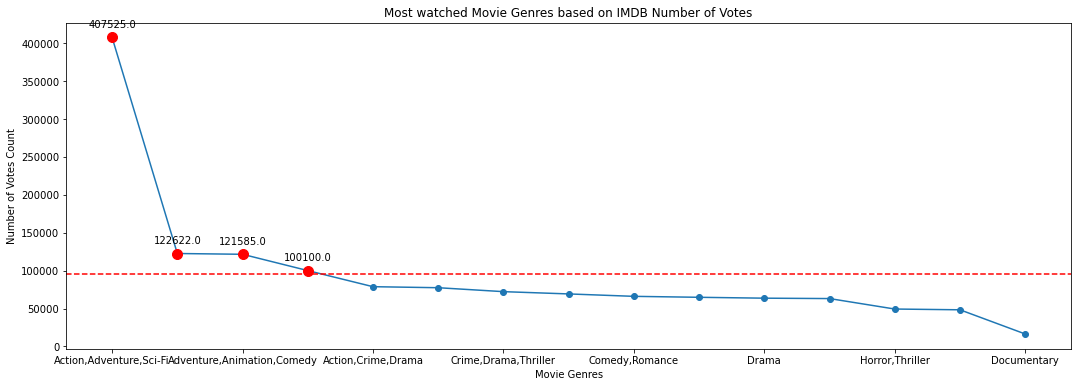

<Figure size 432x288 with 0 Axes>

In [115]:
#creating the line plot
votes_by_genre_plot = votes_by_genre['numvotes']['mean'].plot(kind='line', marker='o', figsize=(18, 6))

#set the title, xlabel, and ylabel
votes_by_genre_plot.set_title("Most watched Movie Genres based on IMDB Number of Votes")
votes_by_genre_plot.set_xlabel("Movie Genres")
votes_by_genre_plot.set_ylabel("Number of Votes Count")

#add the horizontal line
votes_by_genre_plot.axhline(y=95000, color='red', linestyle='--')

#highlight the marker if y value is over 130,000 and label the markers
for x, y in zip(votes_by_genre_plot.get_lines()[0].get_xdata(), votes_by_genre_plot.get_lines()[0].get_ydata()):
    if y > 95000:
        votes_by_genre_plot.plot(x, y, marker='o', markersize=10, color='red')
        votes_by_genre_plot.annotate(str(round(y)), (x, y), xytext=(0, 10), textcoords='offset points', ha='center')

plt.show()

#save plot
plt.savefig("./Graphs/line_votes_genre.png", dpi=150)

The most watched movies, based on the number of votes received, include Action, Adventure, Sci-Fi, Animation, Comedy, and Drama. This aligns with our earlier finding regarding movie ratings across genres. The connection indicates that people responds to the themes in these genres, showing why they're so popular and loved by many.

### Best Months of the Year to release Movies
Using box-office ticket data sourced from the Rotten Tomatoes database, my analysis has pinpointed the optimal months for releasing movies, taking into consideration both hot and cold seasons.

In [68]:
#getting a look into the dataframe
rt_info.head()

,id,rating,genre,director,box_office,runtime,studio,theater_month,theater_year
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,600000,108,Entertainment One,8,2012
6,10,PG-13,Comedy,Jake Kasdan,41032915,82,Paramount Pictures,1,2002
7,13,R,Drama,Ray Lawrence,224114,123,Sony Pictures Classics,4,2006
8,14,R,Drama,Taylor Hackford,134904,117,Not Available,6,2010
15,22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,1039869,108,ATO Pictures,12,2010


In [69]:
#starting with 310 rows of data
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 1555
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             310 non-null    int64 
 1   rating         310 non-null    object
 2   genre          310 non-null    object
 3   director       310 non-null    object
 4   box_office     310 non-null    int64 
 5   runtime        310 non-null    int64 
 6   studio         310 non-null    object
 7   theater_month  310 non-null    int64 
 8   theater_year   310 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 24.2+ KB


Checking the measures of central tendencies of the "box_office" column to make predictions on how to move forward with the analysis of these data files.


In [70]:
#getting the average return on box_office values
rt_info['box_office'].describe()

count         310.00
mean     40370465.81
std      58962397.34
min          2367.00
25%       2861585.00
50%      15671532.50
75%      52835541.25
max     368000000.00
Name: box_office, dtype: float64

When dealing with a dataset that has a large standard deviation, the choice of mean can be influenced by the presence of outliers or skewed data. As seen on the box plot below. \
Box Plot of the distribution of values in the column "box office". Highlighted in read are the outliers.

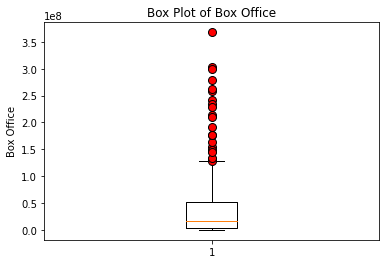

<Figure size 432x288 with 0 Axes>

In [106]:
#box plot with highlighted outliers
plt.boxplot(rt_info['box_office'], flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Box Office')
plt.title('Box Plot of Box Office')
plt.show()

#save plot
plt.savefig("./Graphs/boxoffice_plot.png", dpi=150)

Checking for the distribution of the data, asummning from the box plot that is not normally distributed.

From the graphs below, the distribution is skewed to the right. This means that the majority of the data is concentrated towards the lower values, with a long tail extending towards the higher values.
This type of distribution is a right-skewed distribution. 

I will confirm if the distribution is indeed skewed using the skew() function in pandas.

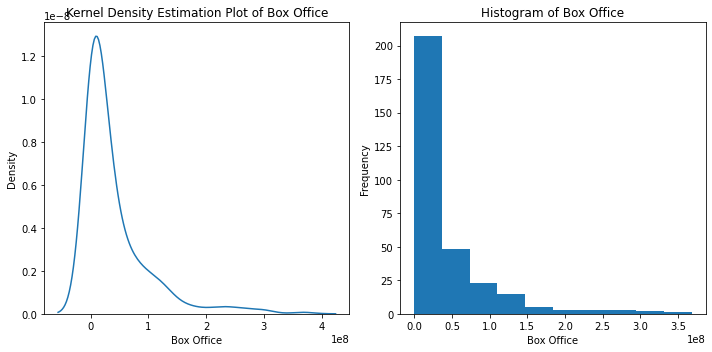

<Figure size 432x288 with 0 Axes>

In [107]:
#creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Plotting the KDE plot on the first subplot
sns.kdeplot(rt_info['box_office'], ax=axes[0])
axes[0].set_xlabel('Box Office')
axes[0].set_ylabel('Density')
axes[0].set_title('Kernel Density Estimation Plot of Box Office')

#Plotting the histogram on the second subplot
axes[1].hist(rt_info['box_office'], bins=10)
axes[1].set_xlabel('Box Office')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Box Office')

#adjusting the spacing between subplots
plt.tight_layout()

#show the figure
plt.show()
#Save plot
plt.savefig("./Graphs/rec2skew.png", dpi=150)

In [73]:
#checking for skewness with skew function
skewness = rt_info['box_office'].skew()

if skewness > 0:
    print("The distribution is positively skewed.")
elif skewness < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")

The distribution is positively skewed.


In this scenario, it's advisable to utilize the median as a measure of central tendency rather than the mean. With the median (50th percentile) for the "box_office" column calculated at 15,671,532.50, it appears to be a more suitable metric for central tendency in this context.

In [74]:
#filtering the dataframe to rows where the bpx_office return/value is over 15,671,533 (median)
filtered_rt_info=rt_info[rt_info['box_office']>15671533]
filtered_rt_info.head()

,id,rating,genre,director,box_office,runtime,studio,theater_month,theater_year
6,10,PG-13,Comedy,Jake Kasdan,41032915,82,Paramount Pictures,1,2002
16,23,R,Drama,Not Available,99165609,129,Sony Pictures,12,2013
18,25,PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,20518224,127,Universal Pictures,12,2013
44,57,R,Comedy,Not Available,132088910,122,The Weinstein Company,11,2012
48,61,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,54100000,93,New Line Cinema,2,2006


In [75]:
#Using groupby function with aggregation of stat measures.
grouped_rtinfo=filtered_rt_info[['theater_month', 'box_office']].groupby(['theater_month']).agg(['count', 'median', 'mean'])
grouped_rtinfo = grouped_rtinfo.sort_values(by=('box_office', 'mean'), ascending=False) #descencing order needed
grouped_rtinfo

box_office                          
                   count       median         mean
theater_month                                     
5                      6 149188962.50 143541295.00
11                    13 114053579.00 113689145.23
6                     12 112643724.50 107517289.75
4                      8  44391316.00  87185449.25
7                     12  69502160.00  85657780.50
2                     15  35003216.00  77898298.20
12                    23  66580191.00  76973102.57
1                     11  41032915.00  59157416.55
10                    18  40025531.50  57130108.33
3                     10  50956992.00  54607478.80
8                     13  33886034.00  52670915.92
9                     14  36836599.00  38722587.86

In [76]:
#getting the mean of box office column
filtered_rt_info['box_office'].mean()

75778279.89677419

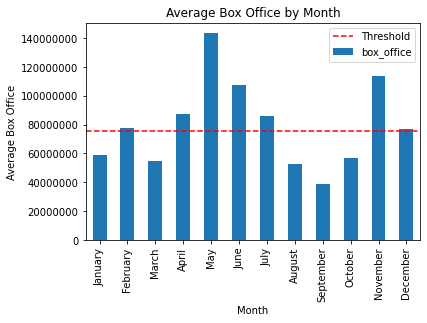

In [108]:
#creating a copy of the DataFrame
filtered_rt_info = filtered_rt_info.copy()

#convert theater_month column to datetime format
filtered_rt_info.loc[:, 'theater_month'] = pd.to_datetime(filtered_rt_info['theater_month'], format='%m')

#group by month and calculate the average box office
box_office_by_month = filtered_rt_info.groupby(filtered_rt_info['theater_month'].dt.strftime('%B'))['box_office'].mean()

#reindex the series to have months in the correct order
box_office_by_month = box_office_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#plot the bar graph
box_office_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Box Office')
plt.title('Average Box Office by Month')

#format y-axis labels as millions
plt.ticklabel_format(axis='y', style='plain', useOffset=False, scilimits=(6, 6))

#add a horizontal line at y=75778279
plt.axhline(y=75778279, color='red', linestyle='--', label='Threshold')

plt.legend()

#Save plot
plt.savefig("./Graphs/bargraph_month.png", dpi=150)

Based on the data analysis of the dataset, the optimal months for releasing films are either April or May through July for the warm season and November-December for the cold season.

### Movies as a Financial Success
The success of a movie release is determined by whether the Gross Revenue equals or exceeds twice the movie's budget. Leveraging data from 'The Numbers,' a renowned website tracking comprehensive business information related to movies, I will provide recommendations based on this analysis.

I will be using 'the numbers' data file to analyze the movies with the highest Profit.

In [80]:
#Getting the information of this dataframe
thenumbers.info() #3,839 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3839 non-null   int64         
 1   release_date       3839 non-null   datetime64[ns]
 2   movie              3839 non-null   object        
 3   production_budget  3839 non-null   int64         
 4   domestic_gross     3839 non-null   int64         
 5   worldwide_gross    3839 non-null   int64         
 6   release_month      3839 non-null   int64         
 7   release_year       3839 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 269.9+ KB


Creating a new dataframe exclusively comprising financially successful movies. This filtered dataframe retains 52% of the rows from the original dataset and will serve as the primary dataset for further data analysis.

In [82]:
#filter the DataFrame based on the condition of only financially successful movies
filtered_thenumbers = thenumbers[thenumbers['worldwide_gross'] >= 2 * thenumbers['production_budget']]
filtered_thenumbers.head(4) #1,843 rows of data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


In [83]:
#checking for stats measurements of the worlwide gross sale column
filtered_thenumbers['worldwide_gross'].describe()

count         1843.00
mean     193060398.92
std      251252773.08
min          71644.00
25%       42429088.00
50%      102404019.00
75%      228629844.00
max     2776345279.00
Name: worldwide_gross, dtype: float64

When working with a dataset exhibiting a substantial standard deviation, the selection of the mean may be impacted by outliers or skewed data, as evident in the box plot below. \
The box plot displays the distribution of values in the "worldwide_gross" column, with outliers highlighted in red.

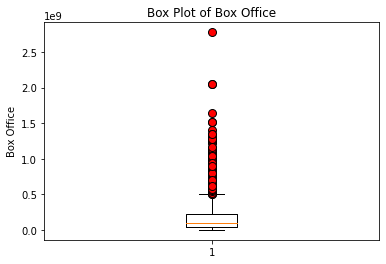

<Figure size 432x288 with 0 Axes>

In [109]:
# box plot with highlighted outliers
plt.boxplot(filtered_thenumbers['worldwide_gross'], flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Box Office')
plt.title('Box Plot of Box Office')
plt.show()
#save plot
plt.savefig("./Graphs/boxplot_grossrevenue.png", dpi=150)

Examining the data distribution, it appears non-normal based on the box plot. \
Observing the graphs below, the distribution is skewed to the right, indicating that the majority of the data is clustered towards lower values, with a lengthy tail extending towards higher values. 
This skewness signifies a right-skewed distribution. \

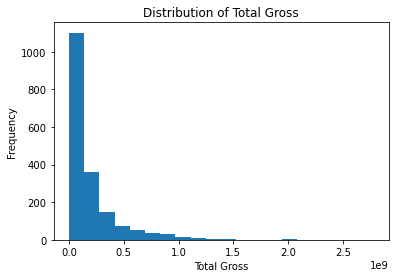

<Figure size 432x288 with 0 Axes>

In [110]:
#create a histogram
filtered_thenumbers['worldwide_gross'].plot(kind='hist', bins=20)
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Frequency')
plt.show()
#save plot
plt.savefig("./Graphs/grossrevenue_barskew.png", dpi=150)

To confirm the skewness, I'll employ the skew() function in pandas.

In [86]:
#checking for skewness with skew function
skewness = filtered_thenumbers['worldwide_gross'].skew()

if skewness > 0:
    print("The distribution is positively skewed.")
elif skewness < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")

The distribution is positively skewed.


In [89]:
#using describe function to get the median of worldwide gross
filtered_thenumbers['worldwide_gross'].describe()
#median is 102,404,019

count         1843.00
mean     193060398.92
std      251252773.08
min          71644.00
25%       42429088.00
50%      102404019.00
75%      228629844.00
max     2776345279.00
Name: worldwide_gross, dtype: float64

Having observed the positively skewed distribution of the total gross, I aim to establish a positive correlation between the budget and gross revenue. This suggests that the revenue of a movie production is influenced by its budget; specifically, a higher budget tends to lead to higher revenue.

Creating a Scatter Plot with a line of best fit to show positive correlation between budget and gross revenue.

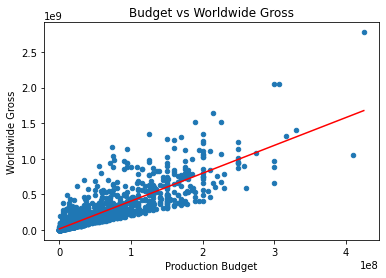

<Figure size 432x288 with 0 Axes>

In [116]:
#filtered_thenumbers dataframe contains 1,843 rows of data.
#create a scatter plot using pandas
filtered_thenumbers.plot(kind='scatter', x='production_budget', y='worldwide_gross')

#fit and plot the line of best fit
fit = np.polyfit(filtered_thenumbers['production_budget'], filtered_thenumbers['worldwide_gross'], 1)
plt.plot(filtered_thenumbers['production_budget'], fit[0] * filtered_thenumbers['production_budget'] + fit[1], color='red')

#set labels and title
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Budget vs Worldwide Gross')

#show the plot
plt.show()

#save plot
plt.savefig("./Graphs/linefit_gross.png", dpi=150)

To verify, I will examine if there exists a positive correlation within the unfiltered dataframe. As illustrated in the graph below, the unfiltered dataframe exhibits a similar positive correlation, reinforcing the notion that the success of a movie is often determined by its budget.

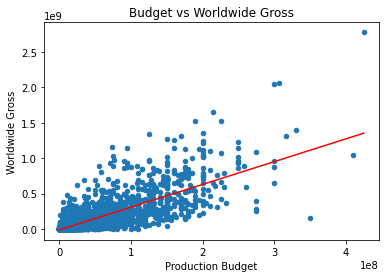

<Figure size 432x288 with 0 Axes>

In [112]:
#thenumbers dataframe contains 3,839 rows of data.
# Create a scatter plot using pandas
thenumbers.plot(kind='scatter', x='production_budget', y='worldwide_gross')

# Fit and plot the line of best fit
fit = np.polyfit(thenumbers['production_budget'], thenumbers['worldwide_gross'], 1)
plt.plot(thenumbers['production_budget'], fit[0] * thenumbers['production_budget'] + fit[1], color='red')

# Set labels and title
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Budget vs Worldwide Gross')

# Show the plot
plt.show()

#Save plot
plt.savefig("./Graphs/linefit_gross2.png", dpi=150)

Based on my analysis, it's evident that the budget significantly impacts the revenue and profitability of a movie. As the budget increases, there is a corresponding rise in revenue and profit, highlighting the crucial role of financial investment in the success of a film.

# Conclusions

# Recommendations